In [171]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fmin_bfgs

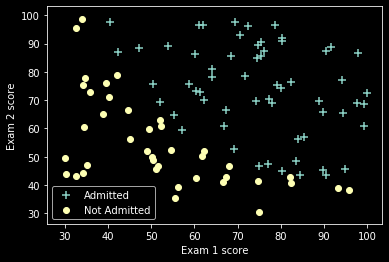

In [172]:
data = pd.read_csv('machine-learning-ex2-master\ex2\ex2data1.txt', header = None)

exams= data.loc[:,0:2]
X = data.loc[:,0:1]
y = data.loc[:,2]
m = y.size
pos = X.loc[y==1]
neg = X.loc[y==0]

ones = np.ones((m,1))
X = np.hstack((ones,X))
theta = np.zeros((3,1))
y = y[:,np.newaxis]

plt.scatter(pos[0],pos[1], marker='+' ,s=60, label="Admitted")
plt.scatter(neg[0],neg[1], marker='o' , label='Not Admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='best')

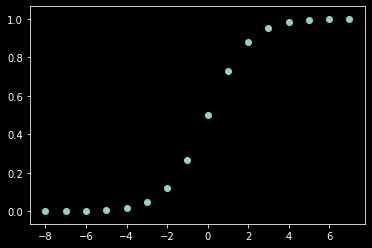

In [173]:
def sigmoid(x):
    return(1 / (1 + np.exp(-x)))
testArray = np.arange(-8,8)
plt.scatter(testArray,sigmoid(testArray))

In [174]:
def costFunction(theta, X, y):
    hx = sigmoid(X.dot(theta))

    J = -1/m*(np.log(hx).T.dot(y)+np.log(1-hx).T.dot(1-y))

    return J

In [175]:
def gradient(theta,X, y):
    temp = sigmoid(np.dot(X, theta))
    temp = temp-y
    temp = np.dot(X.T, temp)
    theta = (1/m) * temp
    return theta.flatten()

In [180]:
print(gradient(theta,X,y))
res = fmin_bfgs(costFunction,theta, args=(X,y),fprime=gradient)


[ -0.1        -12.00921659 -11.26284221]


ValueError: shapes (3,3) and (300,) not aligned: 3 (dim 1) != 300 (dim 0)